In [12]:
import pandas as pd

In [13]:
df = pd.read_csv(r"E:\elevatetrsest\crop price predictor\Crop_price_Prediction\data\edited_21_24.csv")

In [14]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

avg_modal_price  avg_min_price  avg_max_price  month  year  date  \
0           2900.0         2600.0         3000.0     12  2024    31   
1           2800.0         2640.0         2985.0     12  2024    30   
2           2812.5         2700.5         3000.0     12  2024    26   
3           2850.0         2725.0         3000.0     12  2024    23   
4           2874.5         2812.0         2949.5     12  2024    20   

   district_name  commodity_name  state_name  
0            940           29170       29170  
1            940           29170       29170  
2            940           29170       29170  
3            940           29170       29170  
4            940           29170       29170

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27676 entries, 0 to 27675
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   avg_modal_price  27676 non-null  float64
 1   avg_min_price    27676 non-null  float64
 2   avg_max_price    27676 non-null  float64
 3   month            27676 non-null  int64  
 4   year             27676 non-null  int64  
 5   date             27676 non-null  int64  
 6   district_name    27676 non-null  int64  
 7   commodity_name   27676 non-null  int64  
 8   state_name       27676 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.9 MB


In [7]:

df['date_n'] = pd.to_datetime(df['date']).dt.day
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year

df.drop('date', axis=1, inplace=True)
df['date'] = df['date_n']
df.drop('date_n', axis=1, inplace=True)

In [8]:
 df.fillna('interpolate' , inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27676 entries, 0 to 27675
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   avg_modal_price  27676 non-null  float64
 1   avg_min_price    27676 non-null  float64
 2   avg_max_price    27676 non-null  float64
 3   month            27676 non-null  int64  
 4   year             27676 non-null  int64  
 5   date             27676 non-null  int64  
 6   district_name    27676 non-null  int64  
 7   commodity_name   27676 non-null  int64  
 8   state_name       27676 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.9 MB


In [ ]:
columns = ['district_name' , 'commodity_name' , 'state_name']

for col in columns:
    frequency_encoding = df[col].value_counts()
    df[f'{col}_enc'] = df[col].map(frequency_encoding)

df.drop(columns=columns , axis=1 , inplace=True)
df.drop(columns=['calculationType' , 'district_id' , 'change'] , axis=1 , inplace=True)

In [19]:
df.sample(7)

avg_modal_price  avg_min_price  avg_max_price  month  year  date  \
5520            2600.0         2550.0        2750.00      5  2024    20   
26799           2411.5         2411.5        2411.50      8  2023    27   
25455           2337.5         2130.0        2577.50      6  2024     6   
16699           1996.0         1754.0        2313.67      2  2022     2   
19949           3400.0         3000.0        3800.00      4  2024     4   
7540            3095.0         2630.5        3398.50     11  2024    30   
20973           2254.4         2061.0        2459.00      2  2024    16   

       district_name  commodity_name  state_name  
5520            1019           29170       29170  
26799           1306           29170       29170  
25455           1071           29170       29170  
16699           1119           29170       29170  
19949            942           29170       29170  
7540            1427           29170       29170  
20973           1177           29170       29170

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27676 entries, 0 to 27675
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   avg_modal_price  27676 non-null  float64
 1   avg_min_price    27676 non-null  float64
 2   avg_max_price    27676 non-null  float64
 3   month            27676 non-null  int64  
 4   year             27676 non-null  int64  
 5   date             27676 non-null  int64  
 6   district_name    27676 non-null  int64  
 7   commodity_name   27676 non-null  int64  
 8   state_name       27676 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.9 MB


In [21]:
import pandas as pd

def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


df = remove_outliers_iqr(df)

df.head()

avg_modal_price  avg_min_price  avg_max_price  month  year  date  \
0           2900.0         2600.0         3000.0     12  2024    31   
1           2800.0         2640.0         2985.0     12  2024    30   
2           2812.5         2700.5         3000.0     12  2024    26   
3           2850.0         2725.0         3000.0     12  2024    23   
4           2874.5         2812.0         2949.5     12  2024    20   

   district_name  commodity_name  state_name  
0            940           29170       29170  
1            940           29170       29170  
2            940           29170       29170  
3            940           29170       29170  
4            940           29170       29170

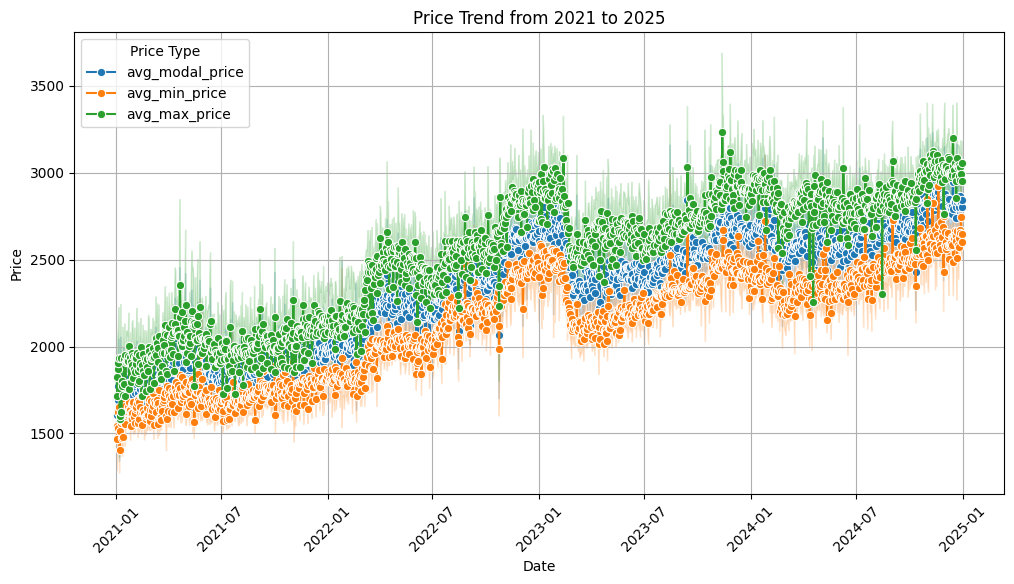

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined with columns: year, month, date, avg_modal_price, avg_min_price, avg_max_price, etc.

# Rename 'date' column to 'day' for compatibility with pd.to_datetime
df.rename(columns={'date': 'day'}, inplace=True)

# Create a datetime column using year, month, and day
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day']])

# Sort the DataFrame by the new datetime column
df = df.sort_values('datetime')

# Melt DataFrame for Seaborn, using 'datetime' as the id variable
df_melted = df.melt(id_vars=['datetime'], 
                    value_vars=['avg_modal_price', 'avg_min_price', 'avg_max_price'],
                    var_name='Price Type', value_name='Price')

# Plot the price trend over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='datetime', y='Price', hue='Price Type', marker='o')
plt.title("Price Trend from 2021 to 2025")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend(title="Price Type")
plt.grid(True)
plt.show()


In [24]:
import pandas as pd
import plotly.express as px

# Assuming df is already defined with the appropriate columns: year, month, date, avg_modal_price, avg_min_price, avg_max_price, etc.

# Create a datetime column using year, month, and date
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day']])

# Sort the DataFrame by the new datetime column
df = df.sort_values('datetime')

# Melt DataFrame to long format for plotting
df_melted = df.melt(id_vars=['datetime'], 
                    value_vars=['avg_modal_price', 'avg_min_price', 'avg_max_price'],
                    var_name='Price Type', value_name='Price')

# Create an interactive line plot with Plotly Express
fig = px.line(df_melted, x='datetime', y='Price', color='Price Type', markers=True,
              title="Price Trend from 2021 to 2025")

fig.update_layout(xaxis_title="Date", yaxis_title="Price")
fig.show()


In [25]:
import pandas as pd

# --- Safe Time-based Features ---
# Create datetime index (safe - no leakage)
df['date_parsed'] = pd.to_datetime(
    df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str),
    errors='coerce'
)

# Extract quarter from date (safe)
df['quarter'] = df['date_parsed'].dt.quarter

# Time trend (safe if created sequentially)
df = df.sort_values('date_parsed')
df['time_trend'] = range(len(df))

# --- Removed All Price-Based Features ---
# Removed: price_spread (uses target variables)
# Removed: modal_deviation (uses target variables)
# Removed: modal_price_lag1 (uses target variable)
# Removed: rolling_modal_mean (uses target variable)
# Removed: all district/commodity aggregates (use target variable)

# --- Final Features That Are Safe ---
# Only keeping features that can be created from the input you'll provide:
# year, month, day, quarter, time_trend (from date)
# plus the categorical encodings:
# district_name_enc, commodity_name_enc, state_name_enc

# Final feature set that matches your prediction pipeline requirements
safe_features = [
    'year', 'month', 'day', 'quarter', 'time_trend',
    'district_name_enc', 'commodity_name_enc', 'state_name_enc'
]

print("Adjusted feature engineering complete. Safe features:")
print(safe_features)

Adjusted feature engineering complete. Safe features:
['year', 'month', 'day', 'quarter', 'time_trend', 'district_name_enc', 'commodity_name_enc', 'state_name_enc']


### feature engineering

In [26]:
df.fillna(method='bfill')

C:\Users\Shiva\AppData\Local\Temp\ipykernel_31688\2831856154.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



avg_modal_price  avg_min_price  avg_max_price  month  year  day  \
27675           1875.0        1600.00        2150.00      1  2021    2   
12474           1565.5        1436.75        1671.00      1  2021    2   
14490           2775.0        2550.00        2900.00      1  2021    2   
19803           2000.0        1902.50        2225.00      1  2021    2   
26372           1477.5        1450.00        1502.50      1  2021    2   
...                ...            ...            ...    ...   ...  ...   
17748           2701.0        2375.00        3100.00     12  2024   31   
5385            2500.0        2500.00        2500.00     12  2024   31   
24172           2555.0        2483.33        2626.67     12  2024   31   
25303           2800.0        2750.00        2875.00     12  2024   31   
0               2900.0        2600.00        3000.00     12  2024   31   

       district_name  commodity_name  state_name   datetime date_parsed  \
27675           1306           29170       29170 2021-01-02  2021-01-02   
12474           1192           29170       29170 2021-01-02  2021-01-02   
14490           1190           29170       29170 2021-01-02  2021-01-02   
19803           1162           29170       29170 2021-01-02  2021-01-02   
26372           1071           29170       29170 2021-01-02  2021-01-02   
...              ...             ...         ...        ...         ...   
17748            975           29170       29170 2024-12-31  2024-12-31   
5385            1019           29170       29170 2024-12-31  2024-12-31   
24172           1132           29170       29170 2024-12-31  2024-12-31   
25303           1071           29170       29170 2024-12-31  2024-12-31   
0                940           29170       29170 2024-12-31  2024-12-31   

       quarter  time_trend  
27675        1           0  
12474        1           1  
14490        1           2  
19803        1           3  
26372        1           4  
...        ...         ...  
17748        4       27450  
5385         4       27451  
24172        4       27452  
25303        4       27453  
0            4       27454  

[27455 rows x 13 columns]

In [27]:
df.drop(columns='date_parsed' , inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27455 entries, 27675 to 0
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   avg_modal_price  27455 non-null  float64       
 1   avg_min_price    27455 non-null  float64       
 2   avg_max_price    27455 non-null  float64       
 3   month            27455 non-null  int64         
 4   year             27455 non-null  int64         
 5   day              27455 non-null  int64         
 6   district_name    27455 non-null  int64         
 7   commodity_name   27455 non-null  int64         
 8   state_name       27455 non-null  int64         
 9   datetime         27455 non-null  datetime64[ns]
 10  quarter          27455 non-null  int32         
 11  time_trend       27455 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(7)
memory usage: 2.6 MB


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from datetime import datetime
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

Enhanced Multi-Target Regression 

In [31]:
import pandas as pd
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.metrics import r2_score, make_scorer
import xgboost as xgb
from skopt import BayesSearchCV

# Ensure df['date'] is in datetime format if needed:
# df['date'] = pd.to_datetime(df['date'])

X = df[['month', 'year', 'day', 'district_name', 'commodity_name', 'state_name']]
y = df[['avg_modal_price', 'avg_min_price', 'avg_max_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

search_space = {
    'estimator__learning_rate': (0.01, 0.3, 'log-uniform'),
    'estimator__max_depth': (3, 12),
    'estimator__subsample': (0.6, 1.0),
    'estimator__colsample_bytree': (0.6, 1.0),
    'estimator__gamma': (0, 0.5),
    'estimator__n_estimators': (100, 1000)
}

def multioutput_r2_score(y_true, y_pred):
    return np.mean([r2_score(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])])

custom_scorer = make_scorer(multioutput_r2_score, greater_is_better=True)

# Removed early_stopping_rounds
model = MultiOutputRegressor(
    xgb.XGBRegressor(
        objective='reg:squarederror',
        tree_method='hist',
        random_state=42
    )
)

opt = BayesSearchCV(
    estimator=model,
    search_spaces=search_space,
    n_iter=100,
    cv=TimeSeriesSplit(n_splits=3),
    scoring=custom_scorer,
    n_jobs=-1,
    verbose=2
)

opt.fit(X_train.values, y_train.values)

best_model = opt.best_estimator_
predictions = best_model.predict(X_test)
print(f"R² Score: {r2_score(y_test, predictions):.2%}")

def add_temporal_features(df):
    df['day_of_year'] = df['datetime'].dt.dayofyear
    df['days_since_start'] = (df['datetime'] - df['datetime'].min()).dt.days
    df['price_ratio'] = df['avg_max_price'] / df['avg_min_price']
    return df

for lag in [1, 7, 30]:
    df[f'modal_price_lag_{lag}'] = df.groupby(
        ['district_name', 'commodity_name']
    )['avg_modal_price'].shift(lag)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

### clean multioutput regressor <br> LightGBM

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27455 entries, 27675 to 0
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   avg_modal_price     27455 non-null  float64       
 1   avg_min_price       27455 non-null  float64       
 2   avg_max_price       27455 non-null  float64       
 3   month               27455 non-null  int64         
 4   year                27455 non-null  int64         
 5   day                 27455 non-null  int64         
 6   district_name       27455 non-null  int64         
 7   commodity_name      27455 non-null  int64         
 8   state_name          27455 non-null  int64         
 9   datetime            27455 non-null  datetime64[ns]
 10  quarter             27455 non-null  int32         
 11  time_trend          27455 non-null  int64         
 12  modal_price_lag_1   27429 non-null  float64       
 13  modal_price_lag_7   27273 non-null  float64       


In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor
import lightgbm as lgb
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

# Assume df is your DataFrame with both existing and newly created features
target_cols = ['avg_modal_price', 'avg_min_price', 'avg_max_price']
# Drop the datetime column as LightGBM does not support datetime64
X = df.drop(columns=target_cols + ['datetime' , 'modal_price_lag_1' , 'modal_price_lag_7' , 'modal_price_lag_30'])
y = df[target_cols]

# Define the split ratio
# split_ratio = 0.8  # 80% for training, 20% for testing

# # Determine the split index
# split_index = int(len(X) * split_ratio)

# # Split the data while maintaining the order
# X_train, X_test = X[:split_index], X[split_index:]
# y_train, y_test = y[:split_index], y[split_index:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Objective function for Hyperopt
def objective(params):
    # Convert params to integers where needed
    params['num_leaves'] = int(params['num_leaves'])
    params['max_depth'] = int(params['max_depth'])
    
    model = MultiOutputRegressor(
        lgb.LGBMRegressor(
            objective='regression',
            n_estimators=75,  # fewer trees for quick tuning
            learning_rate=params['learning_rate'],
            num_leaves=params['num_leaves'],
            max_depth=params['max_depth'],
            random_state=42
        )
    )
    
    # Use 3-fold CV and mean squared error as the metric
    mse = -np.mean(cross_val_score(model, X_train, y_train,
                                   scoring='neg_mean_squared_error', cv=3))
    return {'loss': mse, 'status': STATUS_OK}

# Define search space for hyperparameters
space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'num_leaves': hp.quniform('num_leaves', 20, 150, 1),
    'max_depth': hp.quniform('max_depth', 3, 15, 1)
}

# Run Bayesian optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=20, trials=trials)
best['num_leaves'] = int(best['num_leaves'])
best['max_depth'] = int(best['max_depth'])
print("Best hyperparameters:", best)

# Train final model with the best parameters
final_model = MultiOutputRegressor(
    lgb.LGBMRegressor(
        objective='regression',
        n_estimators=100,
        learning_rate=best['learning_rate'],
        num_leaves=best['num_leaves'],
        max_depth=best['max_depth'],
        random_state=42
    )
)
final_model.fit(X_train, y_train)

# Predict on the validation set
predictions = final_model.predict(X_test)
print("Predictions on validation set:", predictions)
print(f'r2_score {r2_score(predictions , y_test)}')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 337                      
[LightGBM] [Info] Number of data points in the train set: 14642, number of used features: 6
[LightGBM] [Info] Start training from score 2313.044081
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po